In [1]:
% tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, MaxPooling2D, Conv2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

tf.__version__

'2.1.0'

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
# Expanding the dimensions of input image

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [8]:
K = len(set(Y_train))
print('Number of Classes: ', K)

Number of Classes:  10


In [0]:
i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875 steps, validate on 10000 samples
Epoch 1/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5523 - accuracy: 0.8022 - val_loss: 0.3801 - val_accuracy: 0.8587
Epoch 2/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3730 - accuracy: 0.8633 - val_loss: 0.3221 - val_accuracy: 0.8827
Epoch 3/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3329 - accuracy: 0.8778 - val_loss: 0.3134 - val_accuracy: 0.8863
Epoch 4/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2996 - accuracy: 0.8901 - val_loss: 0.2816 - val_accuracy: 0.8962
Epoch 5/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2801 - accuracy: 0.8982 - val_loss: 0.2725 - val_accuracy: 0.8998
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2645 - accuracy: 0.9025 - val_loss: 0.264

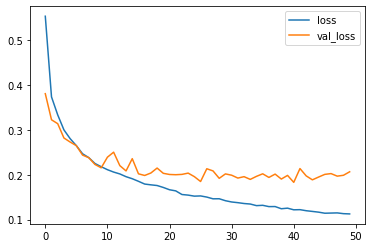

In [12]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

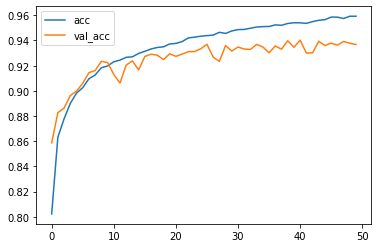

In [13]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()